In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
from decimal import Decimal # to print in scientific notation
import os.path

In [2]:
## read the data file in fp
fileName = "./data_sigma/H-MM1_sigmav.dat"
fp = open (fileName,'r')
## Declaring an empty list to store the data from the .dat file
radius1_list = []  # units cm 
vthermal_list= []      # units cm^{-3}
vthermalerror_list = []
vnontherma_list = []
vnonthermaerror_list = []

## Reading the data from a .dat file line by line
for line in fp:
    t = line.strip().split()  
    radius1_list.append(float(t[0]))
    vthermal_list.append(float(t[1]))
    vthermalerror_list.append(float(t[2]))
    vnontherma_list.append(float(t[3])) 
    vnonthermaerror_list.append(float(t[4]))
    
fp.close()
radius1= np.asarray(radius1_list)
# converting to kms^-1
vthermal = np.asarray(vthermal_list)*10**-3
vnontherma =np.asarray(vnontherma_list)*10**-3
vthermalerror = np.asarray(vthermalerror_list)*10**-3
vnonthermaerror = np.asarray(vnonthermaerror_list)*10**-3

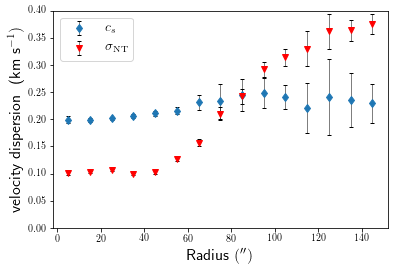

<class 'numpy.ndarray'>


In [3]:
##to convert rho python list to numpy array list for easy manipulation
# plt.figure(figsize = (4,3))

plt.errorbar(radius1,vthermal,yerr=vthermalerror,lw=0,elinewidth=0.5,ecolor='k', fmt='d',markersize=6,capsize=2,label=r'$c_{s}$')
plt.errorbar(radius1,vnontherma,yerr=vnonthermaerror,lw=0, color='red',elinewidth=0.5,ecolor='k', fmt='v',markersize=6,
             capsize=2,label=r'$\sigma_{\rm NT}$')
plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=14,loc=2)
plt.ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 16)
plt.xlabel(r' Radius $(^{\prime\prime})$',Fontsize = 16)
# plt.legend('vthermal','vnonthermal)
# plt.scatter(radius1,vthermal)
# plt.scatter(radius1,vnontherma)
plt.ylim(0,0.4)
plt.show()
print(type(radius1))

In [4]:
print(vthermal)
print(vnontherma)

## interpolation of the data point
from scipy.interpolate import interp1d
print(len(radius1))
x = np.linspace(radius1[0],radius1[len(radius1)-1], num=len(radius1), endpoint=True)
y1 = vthermal
y2 = vnontherma
# f = interp1d(x, y)
f1 = interp1d(x, y1, kind='cubic')
f2 = interp1d(x, y2, kind='cubic')

[ 0.199  0.199  0.202  0.206  0.211  0.216  0.231  0.233  0.245  0.249
  0.241  0.221  0.241  0.236  0.229]
[ 0.101   0.103   0.107   0.0992  0.103   0.127   0.157   0.21    0.242
  0.292   0.314   0.33    0.362   0.364   0.375 ]
15


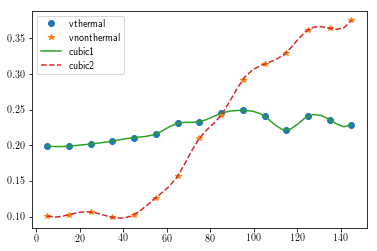

In [5]:
xnew = np.linspace(radius1[0],radius1[len(radius1)-1], num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y1, 'o',x,y2,'*', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['vthermal','vnonthermal', 'cubic1', 'cubic2'], loc='best')
plt.show()

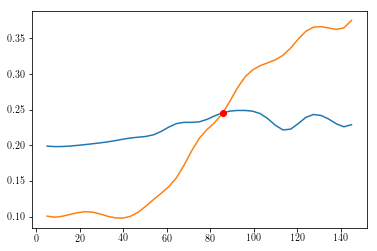

[ 85.90416633] [ 0.2458909]
[ 85.90416633]


In [33]:
# data for fit 
from scipy.optimize import fsolve
import pylab
import numpy

def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x :fun1(x) - fun2(x),47)

result = findIntersection(f1,f2,radius1[0])
x = np.linspace(radius1[0],radius1[14], num=41)
plt.plot(x,f1(x),x,f2(x),result,f1(result),'ro')
plt.show()
print(result,f1(result))
print(result)

In [47]:
save_path = './transonic_data/'
outputfilename = os.path.join(save_path, fileName[13]+fileName[14]+fileName[15]+fileName[16]+fileName[17]+"rt.txt")
np.savetxt(outputfilename, (result))
outputfilename = os.path.join(save_path, fileName[13]+fileName[14]+fileName[15]+fileName[16]+fileName[17]+"sigmat.txt")
np.savetxt(outputfilename, (f1(result)))

In [40]:
print(outputfilename)

./transonic_data/OpH-Xsigmat.txt


In [14]:
print(np.mean(vthermalerror))
print(vthermalerror)

0.0235953333333
[ 0.00619  0.00365  0.0029   0.00317  0.00428  0.00664  0.0139   0.0324
  0.0296   0.0276   0.0227   0.0455   0.0699   0.0497   0.0358 ]


[ 0.199  0.199  0.202  0.206  0.211  0.216  0.231  0.233  0.245  0.249
  0.241  0.221  0.241  0.236  0.229]
